In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv(
    r"C:\Users\hunte\Documents\NNS-DDA10\python\projects\un_data-hunterfogg668\data\gdp_percapita.csv.csv")

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


# 5. How many rows and columns are in `gdp_df`? What are the data types of each column? 7176 rows, 4 columns; float64, float64, int64, object

In [4]:
gdp_df.shape

(7176, 4)

In [5]:
gdp_df.dtypes


Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'. 

In [6]:
gdp_df_2 = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df_2 = gdp_df_2.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'GDP_Per_Capita'})
gdp_df_2

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?  as year decreases, number of observations also decrease

#find data with 31 observations

In [7]:
new_gdp = gdp_df_2.Country.value_counts().to_frame().reset_index()
new_gdp.loc[new_gdp.Country == 31]

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


## There are 205 countries/areas with data for all 31 years

In [8]:
new_gdp.loc[new_gdp.Country != 31].shape

(37, 2)

## 37 countries/areas are missing at least one year of data

In [9]:
year_gdp = gdp_df_2.Year.value_counts()
year_gdp

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [77]:
gdp_df_2.loc[gdp_df_2['Year'] == 2020]

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


#Different Visualizations

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

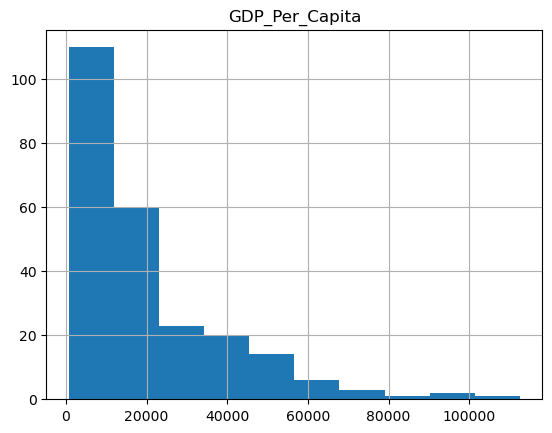

In [79]:
gdp_2020.hist('GDP_Per_Capita')

C:\Users\hunte\AppData\Local\Temp\ipykernel_3340\3122288153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=gdp_2020['GDP_Per_Capita'])


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

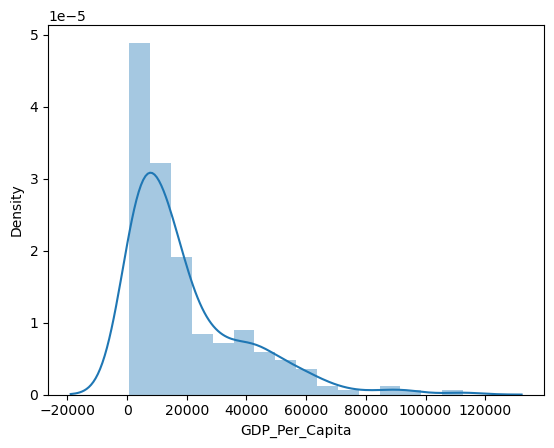

In [78]:
sns.distplot(a=gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

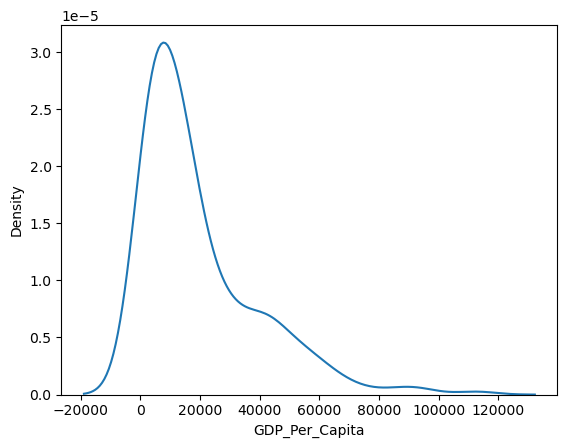

In [82]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: >

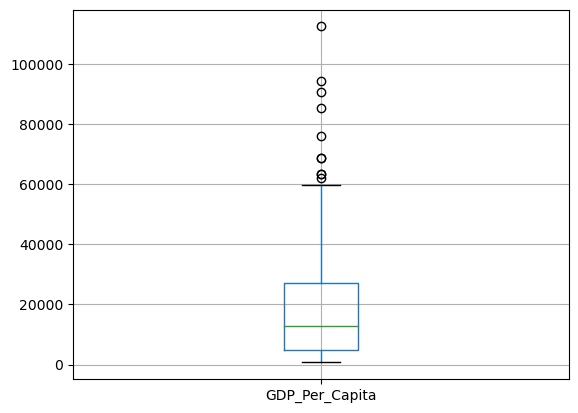

In [80]:
gdp_2020.boxplot('GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

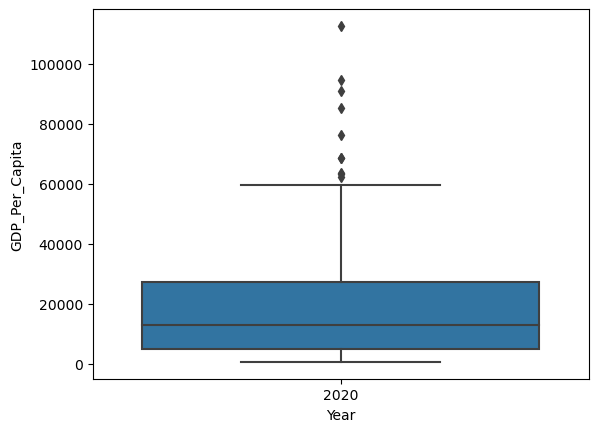

In [81]:
sns.boxplot(x = gdp_2020['Year'], y = gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

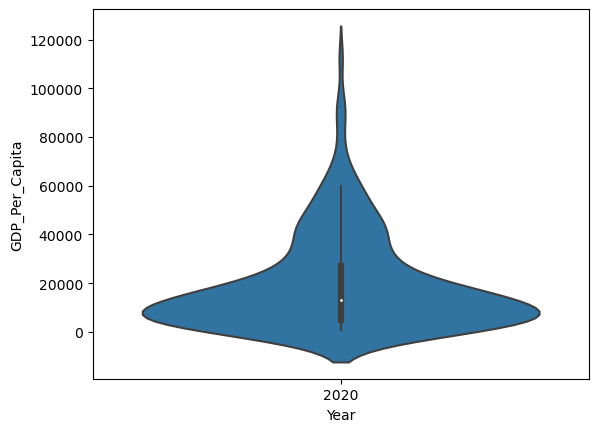

In [83]:
sns.violinplot(x = gdp_2020['Year'], y = gdp_2020['GDP_Per_Capita'])

# 9. What was the median GDP per capita value in 2020? 12908.937406

#Defining gdp_2020

In [14]:
gdp_2020 = gdp_df_2.loc[gdp_df_2['Year'] == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


#Describe to show median

In [15]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2020.0,19496.881712
std,0.0,19586.817493
min,2020.0,731.064074
25%,2020.0,4945.083068
50%,2020.0,12908.937406
75%,2020.0,27196.648661
max,2020.0,112557.309472


## Median is 12908.937406

# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

#Query to define decades

In [16]:
years = [1990, 2000, 2010, 2020]

In [17]:
gdp_decades = gdp_df_2.query('Year in @years')
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


#this also works with
gdp_df_2.loc[gdp_df_2.Year.isin([1990, 2000, 2010, 2020])

#Boxplot for Decades

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

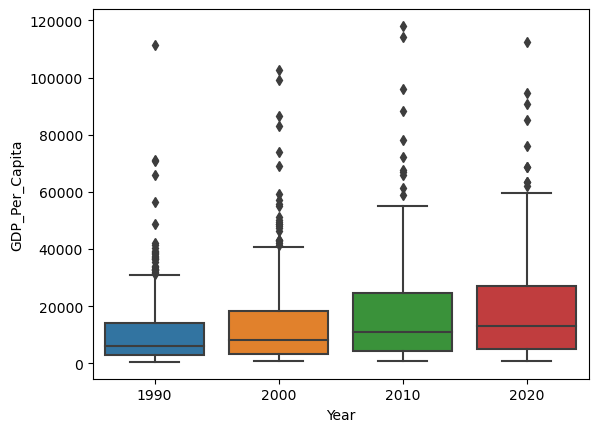

In [18]:
sns.boxplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])

#Barplot for decades

C:\Users\hunte\AppData\Local\Temp\ipykernel_3340\2210766681.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Year', y = 'GDP_Per_Capita',


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

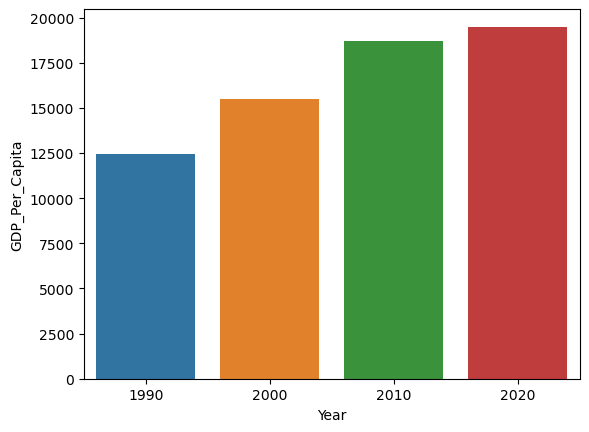

In [19]:
sns.barplot(x = 'Year', y = 'GDP_Per_Capita',
            data = gdp_decades, ci = None)

#Scatterplot for decades

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

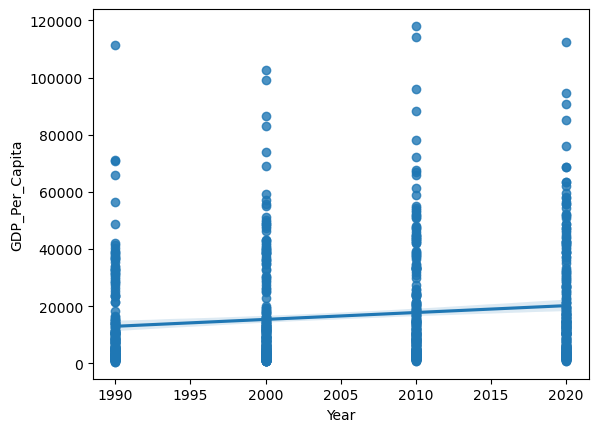

In [84]:
sns.regplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

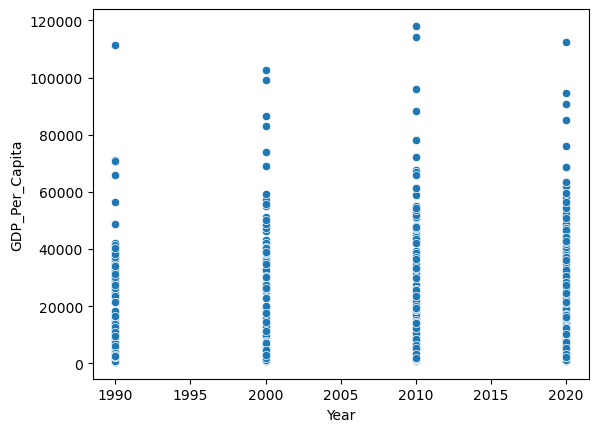

In [85]:
sns.scatterplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_decades)

# 11. Which country was the first to have a GDP per capita greater than 100,000?
United Arab Emirates

#find first country with 100k gdp.
#create df for 1990 and .loc to find gdp over 100k

In [21]:
gdp_1990 = gdp_df_2.loc[gdp_df_2['Year'] == 1990]
gdp_1990_100k = gdp_1990.loc[gdp_1990['GDP_Per_Capita'] > 100000]
gdp_1990_100k

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


In [87]:
gdp_df_2.loc[gdp_df_2.GDP_Per_Capita > 100000].sort_values('Year').head(1)

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

#create a sorted dataframe to find the top GDP per capita in 2020

In [22]:
gdp_2020_sorted = gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)
gdp_2020_sorted.head(1)

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

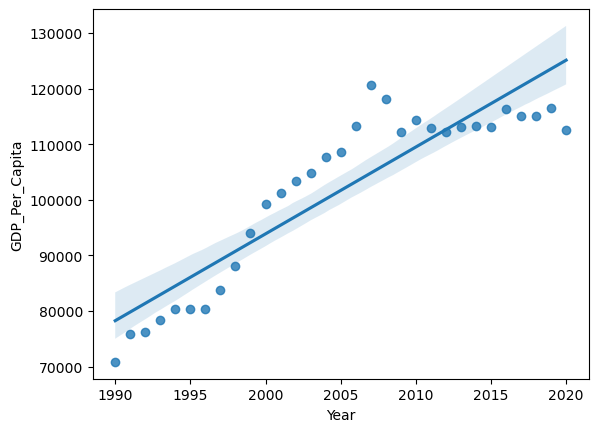

In [23]:
lux_gdp = gdp_df_2.loc[gdp_df_2['Country'] == 'Luxembourg']
sns.regplot(x = lux_gdp['Year'], y = lux_gdp['GDP_Per_Capita'])

# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

#resort it to find lowest GDP for 2020

In [24]:
gdp_2020_sorted = gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)
gdp_2020_sorted.head(1)

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

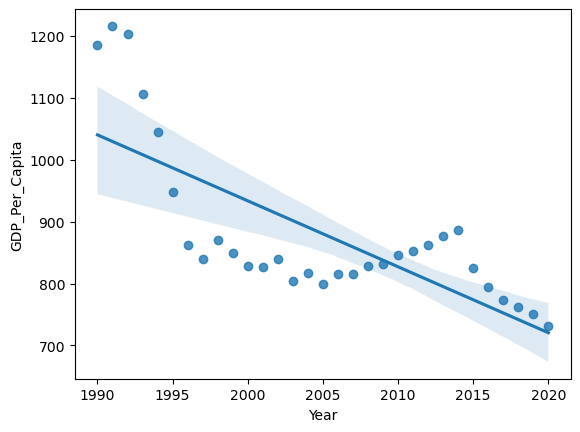

In [25]:
burundi_gdp = gdp_df_2.loc[gdp_df_2['Country'] == 'Burundi']
sns.regplot(x = burundi_gdp['Year'], y = burundi_gdp['GDP_Per_Capita'])

# 13 Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
Average GDP for 1990 is 12491 and 2020 average GDP is 18622. There are 22 countries with a lower GDP in 2020 than in 1990

#join gdp_1990 and gdp_2020

In [26]:
gdp_1990_2020 = pd.merge(gdp_1990, gdp_2020,
                         left_on = 'Country', right_on = 'Country',
                         how = 'inner')
gdp_1990_2020

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104
1,Africa Western and Central,1990,2810.341129,2020,4021.293919
2,Albania,1990,4827.034551,2020,13253.733337
3,Algeria,1990,8746.340762,2020,10735.382539
4,Angola,1990,5758.950488,2020,6141.963839
...,...,...,...,...,...
200,Vanuatu,1990,2855.554643,2020,2878.475335
201,Vietnam,1990,2066.372215,2020,10338.270543
202,World,1990,9704.621768,2020,16269.969854
203,Zambia,1990,2190.181724,2020,3277.816510


In [27]:
gdp_1990_2020.describe()

,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
count,205.0,205.000000,205.0,205.000000
mean,1990.0,12491.590446,2020.0,18622.490464
std,0.0,15376.809408,0.0,19422.203643
min,1990.0,471.325103,2020.0,731.064074
25%,1990.0,2880.571658,2020.0,4726.196559
50%,1990.0,5969.602710,2020.0,12048.927741
75%,1990.0,14202.793216,2020.0,25389.812268
max,1990.0,111454.055665,2020.0,112557.309472


# clean up the joined df

In [28]:
gdp_1990_2020 = gdp_1990_2020.rename(columns = {'GDP_Per_Capita_x' : 'gdp_percap_1990', 
                                                'GDP_Per_Capita_y' : 'gdp_percap_2020'})
gdp_1990_2020

,Country,Year_x,gdp_percap_1990,Year_y,gdp_percap_2020
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104
1,Africa Western and Central,1990,2810.341129,2020,4021.293919
2,Albania,1990,4827.034551,2020,13253.733337
3,Algeria,1990,8746.340762,2020,10735.382539
4,Angola,1990,5758.950488,2020,6141.963839
...,...,...,...,...,...
200,Vanuatu,1990,2855.554643,2020,2878.475335
201,Vietnam,1990,2066.372215,2020,10338.270543
202,World,1990,9704.621768,2020,16269.969854
203,Zambia,1990,2190.181724,2020,3277.816510


#Drop year columns

In [29]:
gdp_1990_2020 = gdp_1990_2020.drop(columns = ['Year_x', 'Year_y'])
gdp_1990_2020

,Country,gdp_percap_1990,gdp_percap_2020
0,Africa Eastern and Southern,3083.976800,3491.978104
1,Africa Western and Central,2810.341129,4021.293919
2,Albania,4827.034551,13253.733337
3,Algeria,8746.340762,10735.382539
4,Angola,5758.950488,6141.963839
...,...,...,...
200,Vanuatu,2855.554643,2878.475335
201,Vietnam,2066.372215,10338.270543
202,World,9704.621768,16269.969854
203,Zambia,2190.181724,3277.816510


#.loc statement to find countries with 

In [30]:
decrease_gdp = gdp_1990_2020.loc[gdp_1990_2020['gdp_percap_1990'] > gdp_1990_2020['gdp_percap_2020']]
decrease_gdp

,Country,gdp_percap_1990,gdp_percap_2020
9,Aruba,32589.018572,29563.756955
15,Barbados,13985.829980,13316.487393
25,Brunei,71232.789430,62200.882043
28,Burundi,1184.842032,731.064074
33,Central African Republic,1201.674665,937.856470
39,Comoros,3061.328732,2984.413403
40,Congo,5068.286948,3497.565454
44,Dem. Rep. Congo,1819.723315,1082.445242
65,Fragile and conflict affected situations,4874.531032,4450.512739
67,Gabon,18179.170002,14320.844646


In [31]:
decrease_gdp.shape

(22, 3)

# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

#importing internet_df file

In [32]:
internet_df = pd.read_csv(
    r"C:\Users\hunte\Documents\NNS-DDA10\python\projects\un_data-hunterfogg668\data\internet_use.csv.csv",
     nrows = 4495)

In [33]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [34]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [35]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [36]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country',
                                            'Year' : 'Year',
                                            'Value' : 'Internet_Users_Pct'})

In [37]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


# 16. Look at the number of observations in this dataset per year. What do you notice?

In [38]:
year_internet = internet_df.Year.value_counts()

In [39]:
year_internet = year_internet.to_frame()

# Convert year_internet to dataframe

In [40]:
year_internet = year_internet.reset_index()
year_internet.head()

,index,Year
0,1990,210
1,2011,207
2,2007,206
3,2008,204
4,2012,203


In [41]:
year_internet = year_internet.rename(columns = {'index' : 'Year', 'Year' : 'Observations'})
year_internet.head()

,Year,Observations
0,1990,210
1,2011,207
2,2007,206
3,2008,204
4,2012,203


# reset and sort

In [42]:
year_internet.sort_values(by = ['Year'], ascending = False)

,Year,Observations
7,2014,202
8,2013,202
4,2012,203
1,2011,207
5,2010,203
6,2009,203
3,2008,204
2,2007,206
12,2006,200
10,2005,201


#observations trail off before 1995 but spike at 1990

# 17. What is the first year to have a non-zero internet users percentage value? 1990

In [43]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [44]:
internet_df.sort_values(by = 'Year').loc[internet_df['Internet_Users_Pct'] != 0]

,Country,Year,Internet_Users_Pct
4276,United Kingdom,1990,0.087355
4301,United States,1990,0.784729
375,Belgium,1990,0.001007
3720,Spain,1990,0.012874
1107,Denmark,1990,0.097277
...,...,...,...
929,Costa Rica,2014,49.410000
2642,Mauritius,2014,41.440000
953,Cote d'Ivoire,2014,14.600000
3366,Saint Kitts and Nevis,2014,65.400000


# 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [45]:
internet_2000 = internet_df.loc[internet_df['Year'] == 2000]

In [46]:
internet_2014 = internet_df.loc[internet_df['Year'] == 2014]

In [47]:
internet_comp = pd.merge(internet_2000, internet_2014,
                        left_on = 'Country', right_on = 'Country',
                        how = 'inner')

In [89]:
internet_comp

,Country,int_user_pct_2000,int_user_pct_2014
0,Albania,0.114097,60.10
1,Algeria,0.491706,18.09
2,Andorra,10.538836,95.90
3,Angola,0.105046,21.26
4,Antigua and Barbuda,6.482226,64.00
...,...,...,...
188,Viet Nam,0.254248,48.31
189,Virgin Islands (U.S.),13.815081,50.07
190,Yemen,0.082500,22.55
191,Zambia,0.191072,17.34


# rename columns appropriates

In [48]:
internet_comp = internet_comp.rename(columns = {'Internet_Users_Pct_x' : 'int_user_pct_2000',
                                               'Internet_Users_Pct_y' : 'int_user_pct_2014'})

# drop year columns

In [49]:
internet_comp = internet_comp.drop(columns = {'Year_x', 'Year_y'})

In [50]:
internet_comp

,Country,int_user_pct_2000,int_user_pct_2014
0,Albania,0.114097,60.10
1,Algeria,0.491706,18.09
2,Andorra,10.538836,95.90
3,Angola,0.105046,21.26
4,Antigua and Barbuda,6.482226,64.00
...,...,...,...
188,Viet Nam,0.254248,48.31
189,Virgin Islands (U.S.),13.815081,50.07
190,Yemen,0.082500,22.55
191,Zambia,0.191072,17.34


In [51]:
internet_comp.describe()

,int_user_pct_2000,int_user_pct_2014
count,193.000000,193.000000
mean,8.520053,46.120414
std,13.071954,29.419630
min,0.000000,0.000000
25%,0.318060,17.760000
50%,2.210692,46.160000
75%,9.138837,70.220000
max,52.000000,98.160000


<Axes: >

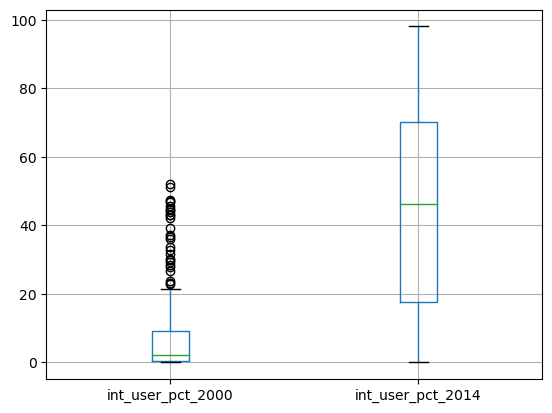

In [88]:
internet_comp.boxplot()

In [52]:
internet_comp.nlargest(3, 'int_user_pct_2014')

,Country,int_user_pct_2000,int_user_pct_2014
81,Iceland,44.470534,98.16
19,Bermuda,42.949860,96.80
131,Norway,52.000000,96.30


In [53]:
internet_comp.nsmallest(3, 'int_user_pct_2014')

,Country,int_user_pct_2000,int_user_pct_2014
47,Dem. People's Rep. of Korea,0.000000,0.00
56,Eritrea,0.136712,0.99
28,Burundi,0.077248,1.38


In [54]:
internet_comp.nsmallest(3, 'int_user_pct_2000')

,Country,int_user_pct_2000,int_user_pct_2014
47,Dem. People's Rep. of Korea,0.000000,0.0
40,Congo (Democratic Republic of the),0.005902,3.0
58,Ethiopia,0.015264,2.9


In [55]:
internet_comp.nlargest(3, 'int_user_pct_2000')

,Country,int_user_pct_2000,int_user_pct_2014
131,Norway,52.000000,96.30
31,Canada,51.300000,87.12
127,New Zealand,47.379557,85.50


In [56]:
internet_comp.shape

(193, 3)

# 19. For how many countries was the percentage of internet users below 5% in 2014? Answer: 16

In [57]:
internet_2014.loc[internet_2014['Internet_Users_Pct'] < 5].shape

(16, 3)

# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [58]:
%who

burundi_gdp	 decrease_gdp	 gdp_1990	 gdp_1990_100k	 gdp_1990_2020	 gdp_2020	 gdp_2020_sorted	 gdp_decades	 gdp_df	 
gdp_df_2	 internet_2000	 internet_2014	 internet_comp	 internet_df	 lux_gdp	 new_gdp	 np	 pd	 
plt	 sns	 year_gdp	 year_internet	 years	 


In [59]:
gdp_df_2.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [60]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [61]:
gdp_and_internet_use =  pd.merge(gdp_df_2, internet_df,
                            left_on = ['Year','Country'], right_on = ['Year','Country'],
                            how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [62]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]

In [91]:
gdp_and_internet_use_2014.nlargest(3, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
2803,Iceland,2014,50450.741612,98.16,High
645,Bermuda,2014,77361.104881,96.80,High
4880,Norway,2014,62390.130313,96.30,High


In [64]:
top3_int_use_2014 = gdp_and_internet_use.loc[(gdp_and_internet_use['Country'] == 'Iceland') | 
                                             (gdp_and_internet_use['Country'] == 'Bermuda') |
                                             (gdp_and_internet_use['Country'] == 'Norway')]
top3_int_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994,NaN,6.794812
7671,Iceland,1993,NaN,2.667825
7672,Iceland,1992,NaN,1.539160
7673,Iceland,1991,NaN,0.505129


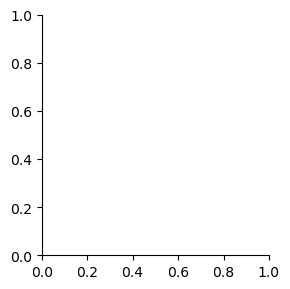

In [65]:
sns.FacetGrid(top3_int_use_2014)

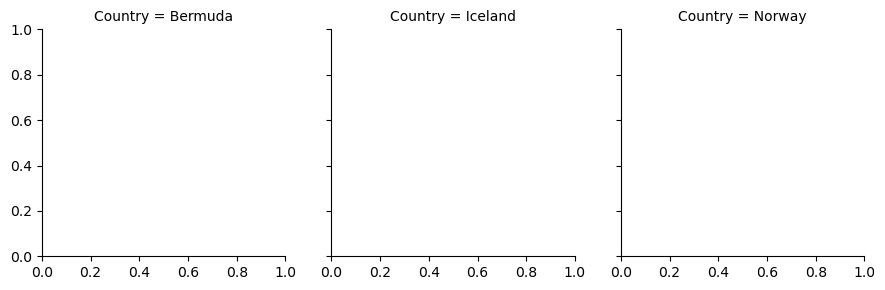

In [66]:
sns.FacetGrid(top3_int_use_2014, col = 'Country')

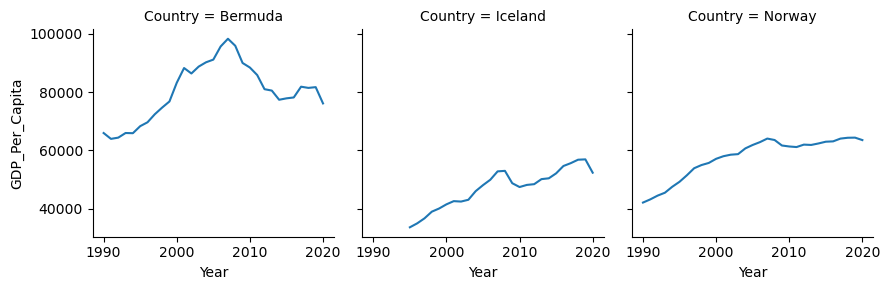

In [92]:
chart = sns.FacetGrid(top3_int_use_2014, col = 'Country')
chart.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

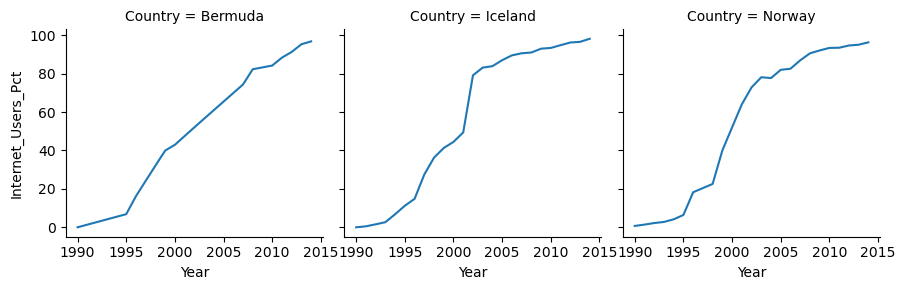

In [95]:
chart = sns.FacetGrid(top3_int_use_2014, col = 'Country')
chart.map(sns.lineplot, 'Year', 'Internet_Users_Pct')

# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

# This was done in a previous question

In [68]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

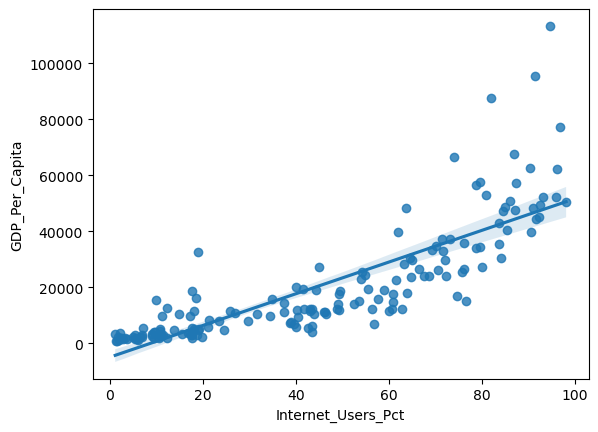

In [69]:
sns.regplot(x=gdp_and_internet_use_2014["Internet_Users_Pct"],
            y=gdp_and_internet_use_2014["GDP_Per_Capita"])

In [70]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_Per_Capita'] > 80000]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3888,Luxembourg,2014,113313.578898,94.67
3919,"Macao SAR, China",2014,155201.740571,NaN
5387,Qatar,2014,95578.261511,91.49
5726,Singapore,2014,87616.637527,82.00


# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [71]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, 
                                            labels = ('Low', 'Medium', 'High'))

C:\Users\hunte\AppData\Local\Temp\ipykernel_3340\1916463022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3,


In [72]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
6,Afghanistan,2014,2102.384604,6.39,Low
25,Africa Eastern and Southern,2014,3677.319414,NaN,Low
56,Africa Western and Central,2014,4215.646000,NaN,Low
87,Albania,2014,11586.833878,60.10,Medium
118,Algeria,2014,11512.690472,18.09,Medium
...,...,...,...,...,...
8147,Turkey,2014,NaN,51.04,NaN
8170,Venezuela,2014,NaN,57.00,NaN
8194,Viet Nam,2014,NaN,48.31,NaN
8214,Virgin Islands (U.S.),2014,NaN,50.07,NaN


# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [73]:
print('Low Group')
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_group'] == 'Low'].median()

Low Group


C:\Users\hunte\AppData\Local\Temp\ipykernel_3340\3321231173.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_group'] == 'Low'].median()


Year                  2014.0000
GDP_Per_Capita        3450.0376
Internet_Users_Pct      10.6000
dtype: float64

In [74]:
print('Meidum Group')
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_group'] == 'Medium'].median()

Meidum Group


C:\Users\hunte\AppData\Local\Temp\ipykernel_3340\1479835285.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_group'] == 'Medium'].median()


Year                   2014.000000
GDP_Per_Capita        12178.874687
Internet_Users_Pct       43.000000
dtype: float64

In [75]:
print('High Group')
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_group'] == 'High'].median()

High Group


C:\Users\hunte\AppData\Local\Temp\ipykernel_3340\2048846084.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_group'] == 'High'].median()


Year                   2014.000000
GDP_Per_Capita        37270.075592
Internet_Users_Pct       78.740000
dtype: float64

# Bonus Exercise: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.